In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("data/table-17-(2014-15).csv", skiprows=13)

In [15]:
# Print the categories that show up in the Contract salary column
df['Contract salary'].unique()

array(['Contract salary < £18,031',
       'Contract salary ≥ £18,031 and < £24,057',
       'Contract salary ≥ £24,057 and < £32,277',
       'Contract salary ≥ £32,277 and < £43,325',
       'Contract salary ≥ £43,325 and < £58,172',
       'Contract salary ≥ £58,172', 'Total'], dtype=object)

In [20]:
# Remove any rows that have an "all" in any field if the column is a string
df = df[~df.apply(lambda x: x.astype(str).str.contains('All').any(), axis=1)]

In [25]:
df = pd.read_csv("data/cleaned/oxford_all_years.txt", sep="\t")

In [29]:
# Remove any rows that have an "all" in any field if the column is a string
df_cleaned = df[~df.apply(lambda x: x.astype(str).str.contains('All').any(), axis=1)]

In [40]:
df.head()

,UKPRN,HE_Provider,Academic_employment_function,Contract_levels,Sex,Academic_Year,Contract_salary,Number,Salary_Band
0,10007774,The University of Oxford,Both teaching and research,Other contract level,Female,2014/15,"Contract salary < £18,031",0,Band_1
1,10007774,The University of Oxford,Both teaching and research,Other contract level,Female,2014/15,"Contract salary ≥ £18,031 and < £24,057",0,Band_2
2,10007774,The University of Oxford,Both teaching and research,Other contract level,Female,2014/15,"Contract salary ≥ £24,057 and < £32,277",5,Band_3
3,10007774,The University of Oxford,Both teaching and research,Other contract level,Female,2014/15,"Contract salary ≥ £32,277 and < £43,325",50,Band_4
4,10007774,The University of Oxford,Both teaching and research,Other contract level,Female,2014/15,"Contract salary ≥ £43,325 and < £58,172",90,Band_5


C:\Users\Gabi\AppData\Local\Temp\ipykernel_27496\3240642349.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  proportions = pd.concat([proportions, pd.DataFrame({'Proportion': val, 'Year':academic_year, 'Salary_Band':band}, index=[0])], ignore_index=True)


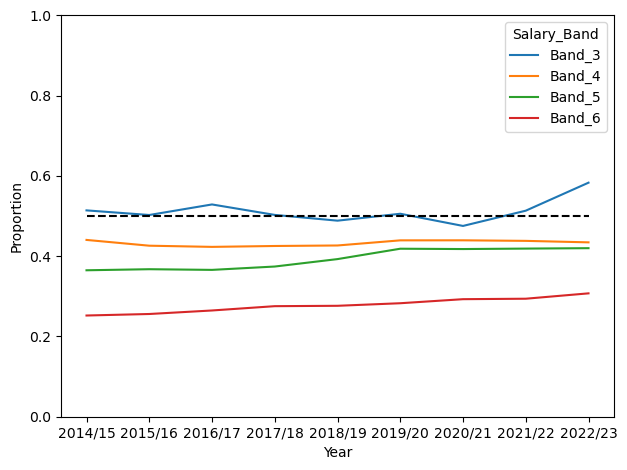

In [129]:
proportions = pd.DataFrame(columns=['Year', 'Proportion'], index=[])
proportions.set_index('Year', inplace=True)

for band in df_cleaned['Salary_Band'].unique():
    for academic_year in df_cleaned['Academic_Year'].unique():
        counts = [(df_cleaned[
            (df_cleaned['Salary_Band']==band) &\
            (df_cleaned['Academic_Year']==academic_year) &\
            (df_cleaned['Sex']==sex)]['Number'].sum()) for sex in ['Female', 'Male']]
        
        if counts[1] == 0:
            continue
        else:
            val = counts[0]/(counts[0] + counts[1])
        proportions = pd.concat([proportions, pd.DataFrame({'Proportion': val, 'Year':academic_year, 'Salary_Band':band}, index=[0])], ignore_index=True)

import matplotlib.pyplot as plt
sns.lineplot(data=proportions, x='Year', y='Proportion', hue='Salary_Band')
plt.ylim(0, 1)
plt.hlines(0.5, 0, 8, linestyles='dashed', colors='black')
plt.tight_layout()


In [144]:
proportions = pd.DataFrame(columns=['Year', 'Proportion'], index=[])
proportions.set_index('Year', inplace=True)

def plot_thing(ax, thing='Salary_Band'):
    proportions = pd.DataFrame(columns=['Year', 'Proportion'], index=[])
    proportions.set_index('Year', inplace=True)
    for band in df_cleaned[thing].unique():
        for academic_year in df_cleaned['Academic_Year'].unique():
            counts = [(df_cleaned[
                (df_cleaned[thing]==band) &\
                (df_cleaned['Academic_Year']==academic_year) &\
                (df_cleaned['Sex']==sex)]['Number'].sum()) for sex in ['Female', 'Male']]
            
            if counts[1] == 0:
                continue
            else:
                val = counts[0]/(counts[0] + counts[1])
            proportions = pd.concat([proportions, pd.DataFrame({'Proportion': val, 'Year':academic_year, thing:band}, index=[0])], ignore_index=True)

    sns.lineplot(ax=ax, data=proportions, x='Year', y='Proportion', hue=thing)
    # ax.set_ylim(0, 1)
    ax.hlines(0.5, 0, 8, linestyles='dashed', colors='black')
    plt.tight_layout()

In [136]:
df_cleaned.head()

,UKPRN,HE_Provider,Academic_employment_function,Contract_levels,Sex,Academic_Year,Contract_salary,Number,Salary_Band
0,10007774,The University of Oxford,Both teaching and research,Other contract level,Female,2014/15,"Contract salary < £18,031",0,Band_1
1,10007774,The University of Oxford,Both teaching and research,Other contract level,Female,2014/15,"Contract salary ≥ £18,031 and < £24,057",0,Band_2
2,10007774,The University of Oxford,Both teaching and research,Other contract level,Female,2014/15,"Contract salary ≥ £24,057 and < £32,277",5,Band_3
3,10007774,The University of Oxford,Both teaching and research,Other contract level,Female,2014/15,"Contract salary ≥ £32,277 and < £43,325",50,Band_4
4,10007774,The University of Oxford,Both teaching and research,Other contract level,Female,2014/15,"Contract salary ≥ £43,325 and < £58,172",90,Band_5


C:\Users\Gabi\AppData\Local\Temp\ipykernel_27496\3435256419.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  proportions = pd.concat([proportions, pd.DataFrame({'Proportion': val, 'Year':academic_year, thing:band}, index=[0])], ignore_index=True)
C:\Users\Gabi\AppData\Local\Temp\ipykernel_27496\3435256419.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  proportions = pd.concat([proportions, pd.DataFrame({'Proportion': val, 'Year':academic_year, thing:band}, index=[0])], ignore_index=True

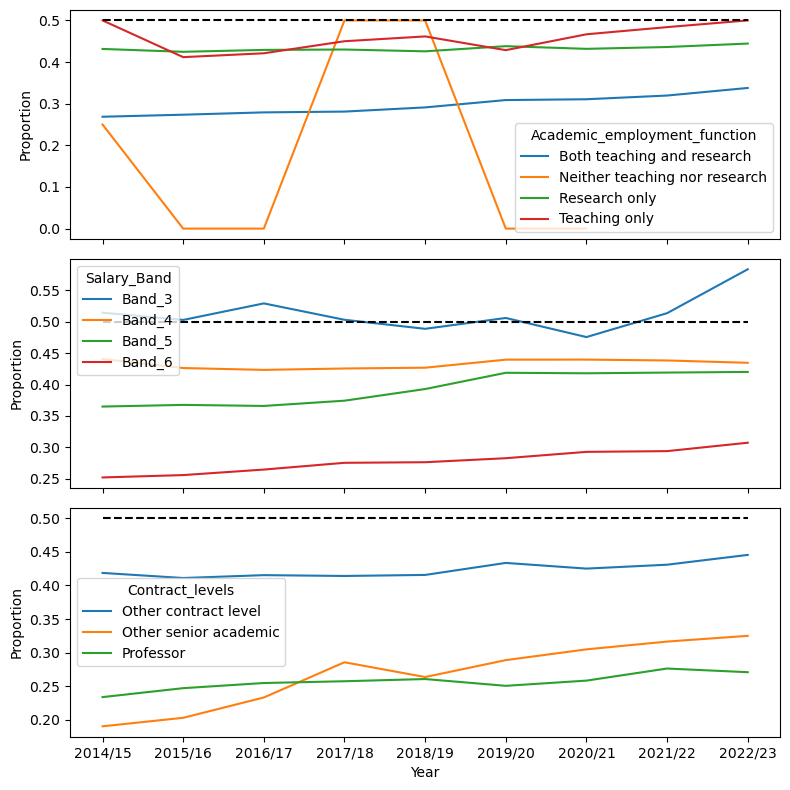

In [146]:
fig, axs = plt.subplots(3, 1, figsize=(8, 8), sharex=True)

plot_thing(axs[0], 'Academic_employment_function')
plot_thing(axs[1], 'Salary_Band')
plot_thing(axs[2], 'Contract_levels')

plt.savefig('plots/oxford_proportions.png', dpi=300)